# Analysis of Titanic Data

In [ ]:
import csv
import numpy as np
import matplotlib.pyplot as plt

## Importation of Data 


Importation des données et separation pour meilleur analyse


In [129]:

titanic = []
with open('titanic.csv', newline='') as csvfile: 
    reader = csv.DictReader(csvfile) #Première ligne avec le noms des variables 
    for i, row in enumerate(reader,start=1) :  # 1 pour ne pas prendre le header en compte 
        survived = int(row['Survived']) # 0 = No, 1 = Yes
        pclass = float(row['Pclass']) #	1 = 1st, 2 = 2nd, 3 = 3rd
        sex = 0 if row['Sex'] == 'female' else 1
        age = float(row['Age']) 
        sibsp = int(row['Siblings/Spouses Aboard']) #Siblings and spouses 
        parch = int(row['Parents/Children Aboard']) # Parents and children 
        fare = float(row['Fare'])
        titanic.append([survived,pclass,sex,age,sibsp,parch,fare]) 
titanic = np.array(titanic)
print(titanic.shape)
n,p = titanic.shape
#Affectation de chaque colonne à une variable pour mieux analyser
survie = titanic[:,0]
pclass = titanic[:,1]
sex = titanic[:,2]
age = titanic[:,3]
sibsp = titanic[:,4]
parch = titanic[:,5]
fare = titanic[:,6]
#Variables X d'étude 
X =  titanic[:,1:]
y = survie

(887, 7)


### **Description de la variable 'age'**

Text(0.5, 1.0, 'Comparaison des âges : passagers décédés vs survivants')

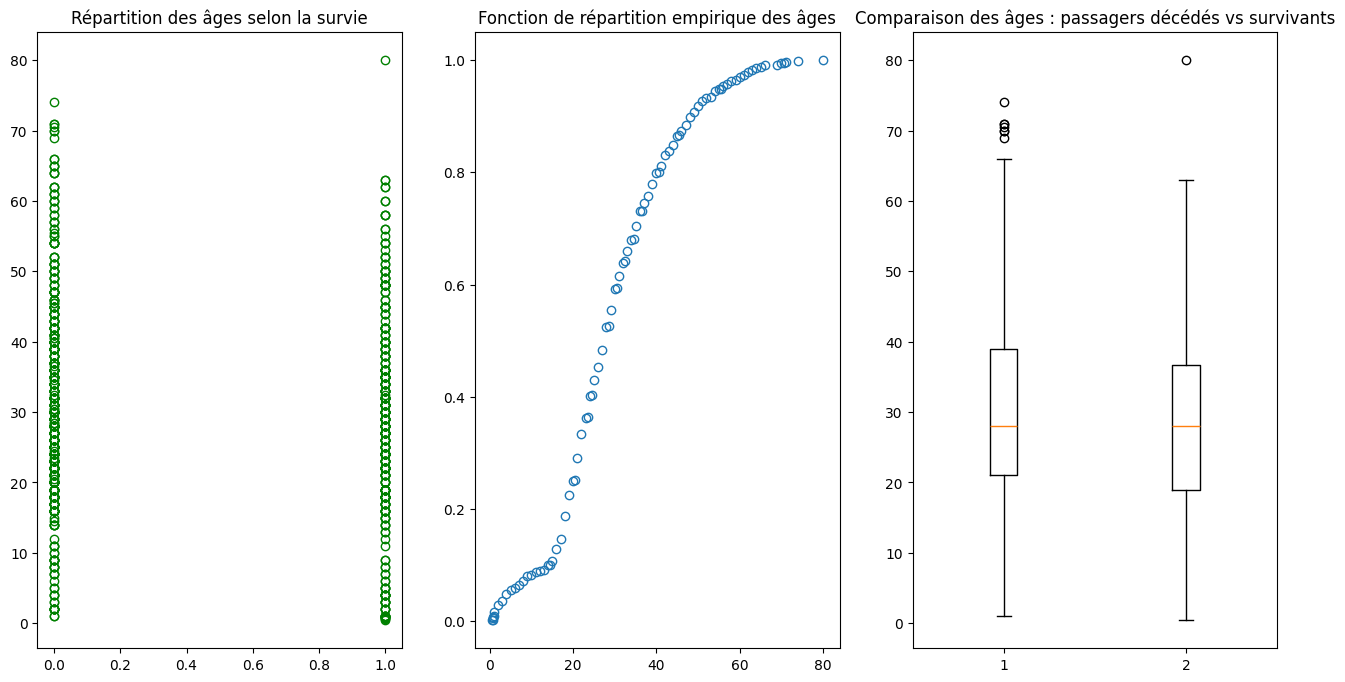

In [130]:
fig =plt.figure(figsize=(16, 8))
ax1 = plt.subplot(1,3,1)
plt.plot(survie,age,'o',mfc = 'none',color = 'green') # La survie en focntion de l'age
mod_age,eff_age = np.unique(age,return_counts=True)
f_cum_age = np.cumsum(eff_age / np.sum(eff_age))
ax2 =plt.subplot(1,3,2)
plt.plot(mod_age,f_cum_age,'o',mfc = 'none') #fonction empirique sur laquelle on voit qu''il y a un acroisement lent pour l'age entre 0 et 15
ages_morts = age[survie==0]
ages_vivant = age[survie==1]
ax3 =plt.subplot(1,3,3)
plt.boxplot([ages_morts,ages_vivant])

#Ajout de ritre 

ax1.set_title("Répartition des âges selon la survie")
ax2.set_title("Fonction de répartition empirique des âges")
ax3.set_title("Comparaison des âges : passagers décédés vs survivants")

In [ ]:
bins = np.linspace(0, 80, 80)  #un bin pour chaque age
plt.figure(figsize=(16, 8))
plt.hist([ages_vivant,ages_morts], 
         bins=bins, 
         color=['green', 'red'],
         label=['Survivants','Décédés']);
plt.legend()
plt.title("Histogramme de la survie en fonction de l'age")

##### Manquants

- Moyenne, médiane, écart-type de age, ages_vivant et ages_morts

In [ ]:
print("Âge moyen des survivants :", np.mean(ages_vivant))
print("Âge moyen des morts :", np.mean(ages_morts))
print("Médiane âge survivants :", np.median(ages_vivant))


### **Description variable 'sex'**

In [ ]:
femmes = sex == 0
hommes = sex == 1
vivants = survie == 1
morts = survie == 0
# Groupes
femmes_mortes = titanic[np.logical_and(femmes, morts)]
femmes_vivantes = titanic[np.logical_and(femmes,vivants)]
hommes_morts = titanic[np.logical_and(hommes,morts)]
hommes_vivants = titanic[np.logical_and(hommes,vivants)]

nb_femmes_mortes = len(femmes_mortes)
nb_hommes_morts = len(hommes_morts)
nb_femmes_vivantes = len(femmes_vivantes)
nb_hommes_vivants = len(hommes_vivants)

print('Rapport morts/vivants chez les hommes: ',nb_hommes_morts/nb_hommes_vivants)
print('Rapport morts/vivants chez les femmes: ',nb_femmes_mortes/nb_femmes_vivantes)

fig = plt.figure(figsize=(10, 5))
ax1 = plt.subplot(1,2,1)
plt.bar([f'Femmes mortes - {nb_femmes_mortes}', f'Hommes morts - {nb_hommes_morts}'], [nb_femmes_mortes, nb_hommes_morts], color=['red', 'blue'])
ax2 = plt.subplot(1,2,2)
plt.bar([f'Femmes vivantes - {nb_femmes_vivantes}', f'Hommes vivants - {nb_hommes_vivants}'], [nb_femmes_vivantes, nb_hommes_vivants], color=['red', 'blue'])

#Ajout des titres 
ax1.set_title('Femmes/Hommes morts')
ax2.set_title('Femmes/Hommes vivants')


### **Description variable 'pclass'**

In [ ]:
premiere = pclass == 1
deuxieme = pclass == 2
troisieme = pclass == 3

morts_premiere = titanic[np.logical_and(premiere,morts)]
vivants_premiere = titanic[np.logical_and(premiere,vivants)]
morts_deuxieme = titanic[np.logical_and(deuxieme,morts)]
vivants_deuxieme = titanic[np.logical_and(deuxieme,vivants)]
morts_troisieme = titanic[np.logical_and(troisieme,morts)]
vivants_troisieme = titanic[np.logical_and(troisieme,vivants)]

nb_premiere_morts = len(morts_premiere)
nb_deuxieme_morts = len(morts_deuxieme)
nb_troisieme_morts = len(morts_troisieme)
nb_premiere_vivants = len(vivants_premiere)
nb_deuxieme_vivants = len(vivants_deuxieme)
nb_troisieme_vivants = len(vivants_troisieme)

print('Rapport morts/vivants en premiere classe ',nb_premiere_morts/nb_premiere_vivants)
print('Rapport morts/vivants en deuxieme classe: ',nb_deuxieme_morts/nb_deuxieme_vivants)
print('Rapport morts/vivants en troisieme classe: ',nb_troisieme_morts/nb_troisieme_vivants)

plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.title('Morts')
plt.bar([f'1ere - {nb_premiere_morts}', f'2eme - {nb_deuxieme_morts}', f'3eme - {nb_troisieme_morts}'], [nb_premiere_morts, nb_deuxieme_morts,nb_troisieme_morts], color=['red', 'blue','green'])
plt.subplot(1,2,2)
plt.title('Survivants')
plt.bar([f'1ere - {nb_premiere_vivants}', f'2eme - {nb_deuxieme_vivants}', f'3eme - {nb_troisieme_vivants}'], [nb_premiere_vivants, nb_deuxieme_vivants,nb_troisieme_vivants], color=['red', 'blue','green'])

#### Manquant 

-  Taux de survie en première...
taux_survie_premiere = nb_premiere_vivants / (nb_premiere_morts + nb_premiere_vivants)

### **Etude des variables sibsp et parch**

In [ ]:
#Ici on représente le taux de survie des passagers en fonction du nombre du nombre de leurs parents ou enfants à bord
mod_parch = np.unique(parch)
taux_survie_par_parch = {}

for mod in mod_parch:
    total_mod = titanic[parch == mod]
    survivants_mod = titanic[np.logical_and(parch == mod, vivants)]
    taux = len(survivants_mod) / len(total_mod) * 100
    taux_survie_par_parch[mod] = taux
    print('Pourcentage pour' ,mod, 'parch: ',round(taux_survie_par_parch[mod],2), ' %')
 
plt.bar(mod_parch, taux_survie_par_parch.values(), color='mediumseagreen')
plt.ylabel('Pourcentage')
plt.xlabel('Nombre de parch(de 0 à 6)')
plt.xticks(np.arange(7));
plt.title('Pourcentage de survie par rapport aux nombres de parents et enfants ')
# on voit par exemple que lorsqu'un passager a 3 enfants et parents au total son chance de survie est de 60%

Interprétation :

On observe que les passagers avec 1 à 3 proches (parch) ont des taux de survie supérieurs à ceux voyageant seuls (parch = 0). En revanche, les taux chutent drastiquement pour ceux ayant plus de 3 proches à bord. Cela pourrait indiquer qu’un petit entourage augmente les chances d’aide et de survie, tandis qu’un entourage trop grand complique l'évacuation.

In [ ]:
# Ici on représente le taux de survie des passagers en fonction du nombre du nombre de leurs frères, soeurs ou époux à bord
mod_sibsp = np.unique(sibsp)
taux_survie_par_sibsp = {}

for mod in mod_sibsp:
    total_mod = titanic[sibsp == mod]
    survivants_mod = titanic[np.logical_and(sibsp == mod, vivants)]
    taux = len(survivants_mod) / len(total_mod) * 100
    taux_survie_par_sibsp[mod] = taux
    print('Pourcentage pour' ,mod, 'sibsp: ',round(taux_survie_par_sibsp[mod],2),' %')


plt.bar(mod_sibsp, taux_survie_par_sibsp.values(), color='mediumseagreen')
plt.ylabel('Pourcentage')
plt.xlabel('Nombre de sibsp (de 0 à 8)')
plt.xticks(np.arange(9)); 

# on voit par exemple que lorsqu'un passager a 1 époux, frère ou soeur au total son chance de survie est de 60%

On voit que les familles de petite taille ont statistiquement plus de chance pour survivre

#### Proposition d'une variable famille

In [ ]:
famille = parch + sibsp
mod_famille = np.unique(famille)
taux_survie_famille = {}

for mod in mod_famille:
    total_mod = np.sum(famille == mod)
    survivants_mod = np.sum(np.logical_and((famille==mod),(survie == 1)))
    taux = survivants_mod / total_mod * 100
    taux_survie_famille[mod] = taux

plt.bar(mod_famille, taux_survie_famille.values(), color='cornflowerblue')
plt.xlabel("Taille de la famille (sibsp + parch)")
plt.ylabel("Taux de survie (%)")
plt.title("Taux de survie en fonction de la taille de la famille")


### **Description de la variable 'fare'**

In [ ]:
# Choisir les tranches de prix
bins = np.arange(0, np.max(fare)+10, 5)  # par tranches de 20
print(np.max(fare))
# Histogramme groupé pour morts et survivants
plt.figure(figsize=(16, 8))
plt.hist([fare[vivants], fare[morts]],
         bins=bins,
         color=['green', 'red'],
         label=['Survivants', 'Décédés'])

plt.xlabel("Tarif du billet (Fare)")
plt.ylabel("Nombre de passagers")
plt.title("Répartition des passagers selon le prix payé")
plt.legend()


#### Manquant


In [ ]:
print("Statistiques descriptives sur 'fare' :")
print("Prix moyen :", np.mean(fare))
print("Prix médian :", np.median(fare))
print("Prix minimum :", np.min(fare))
print("Prix maximum :", np.max(fare))
print("Écart-type :", np.std(fare))


In [ ]:
print("Moyenne 'fare' des survivants :", np.mean(fare[vivants]))
print("Moyenne 'fare' des morts :", np.mean(fare[morts]))


Interprétation : la moyenne des survivants est significativement plus élevée, cela peut indiquer un lien entre richesse et survie.

## ACP

In [ ]:
print(X.shape)
#Centrage et réduction des données 
Xc = X-np.mean(X,axis=0)
Xr = Xc/np.std(X,axis=0)

#Matrice de Correlation 
cov = (1/n) * (Xr.T@Xr)
plt.matshow(cov)
plt.colorbar()
plt.title("Matrice de covariance")

In [ ]:
eigenvalues, eigenvectors = np.linalg.eigh(cov)
print(eigenvalues, eigenvectors)

var_explique = np.cumsum((eigenvalues/ np.sum(eigenvalues))) * 100
plt.title('Pourcentage de chaques axes principales' )
plt.bar(range(len(var_explique)) , var_explique)

## Tests statistiques D'indépendance 

### **Test statistique Famille**

Objectif renier ou non ces hypothèses : 

\begin{equation}
 \begin{cases}
    H_0 : \text{Taille de la famille est indépendant avec survie}\\
    H_1 : \text{Taille de la famille dépendant avec survie}
  \end{cases}
\end{equation}

Loi du $chi2$

#### Tableau de contingence
$$
\begin{array}{|c||c|}
\hline
                 & Survie = 0 & survie = 1 \\
 \hline \hline
 tailleFamille = 0 & ... &  ...  \\
 \hline
 tailleFamille = 1 &  ...  &  ... \\
 \hline
    tailleFamille = 2 &  ...  &... \\
\hline
tailleFamille = ... & ...  & ...\\
 \hline
 

\end{array}
$$

In [ ]:
# print(sibsp.shape)
# print(parch.shape)

#Création du groupe famille 
tailleFamille = 1+sibsp +parch

#Affichage des différentes tailles de familles
modalite, effectif = np.unique(tailleFamille ,return_counts=True)

#Initilisation du tableau de contingence 
tab_cont_famille = np.zeros((len(modalite),2))

#Remplissage du tableau de contingence 
print('Tableau de contingence initiale: ')
for s in range(2):
    for f in range(len(modalite)) :
        tab_cont_famille[f,s] = np.sum(np.logical_and((tailleFamille == modalite[f]),(survie == s) ))

print(tab_cont_famille)
#Pour veiller à un bon test du chi2 (effectif >5 pour chaques éléments du tableau)
taille_reduit = len(modalite)-4
tab_cont_famille_2 = np.zeros((taille_reduit , 2))
print(tab_cont_famille_2.shape)


#Remplissage du tableau de contingence du test 
#Regroupement des modalités
print('Tableau de contingence test: ')
for s in range(2):
    for f in range(taille_reduit) :
        tab_cont_famille_2[f,s] = tab_cont_famille[f,s]

tab_cont_famille_2[taille_reduit-1,0] = (tab_cont_famille_2[taille_reduit-1,0] + np.sum(tab_cont_famille[taille_reduit:,0]))
tab_cont_famille_2[taille_reduit-1,1] = (tab_cont_famille_2[taille_reduit-1,1] + np.sum(tab_cont_famille[taille_reduit:,1]))
print(tab_cont_famille_2)


In [ ]:

marg_l = np.sum(tab_cont_famille_2 , axis=1)/ (np.sum(tab_cont_famille_2))
marg_c = np.sum(tab_cont_famille_2 , axis=0)/ (np.sum(tab_cont_famille_2))
# marg_l,marg_c

#Creation d'un tableau sous hypothèse d'indépendance
print('')
print('Tableau indépendant :' ) 
tab_th_famille = np.outer(marg_c,marg_l).T * (np.sum(tab_cont_famille_2))
print(tab_th_famille)
#Calcul du chi2
chi_2 = np.sum((tab_cont_famille_2 - tab_th_famille)**2/(tab_th_famille))
print('chi2')
print(chi_2)

#Vérification de la valeur du chi2
from scipy.stats import chi2_contingency 

chi2_check, pvaleur, ddl, tab_th_check = chi2_contingency(tab_cont_famille_2)
print(chi2_check) #Meme valeur bonne estimation du chi2

#p-valeur
print('p-valeur')
print(pvaleur)
print('ddl')
print(ddl)

### Conclusion 

La p-valeur $9.477095441215173e-16 <  0.05$ nous pouvons rejeter $H_0$



### **Pclass - chi2**

$$
\begin{array}{|c||c|}
\hline
                 & Survie = 0 & survie = 1 \\
 \hline \hline
 class = 1 & ... &  ...  \\
 \hline
 class = 2 &  ...  &  ... \\
 \hline
    class = 3 &  ...  &... \\
\hline

 

\end{array}
$$

In [ ]:
mod, eff = np.unique(pclass,return_counts=True)


tab_cont_class = np.zeros((len(mod),2))
for s in range(2):
    for c in range(len(mod)) :
       tab_cont_class[c,s] = np.sum(np.logical_and((pclass == mod[c]),(survie == s) ))
print("tableau de contingence de class/survie ")
print(tab_cont_class)

In [ ]:
print(chi2_contingency(tab_cont_class))


### **$\chi_2$ fare** -- Plus précis 

$$
\begin{array}{|c||c|}
\hline
                 & Survie = 0 & survie = 1 \\
 \hline \hline
 faible  & ... &  ...  \\
 \hline
 moyen  &  ...  &  ... \\
 \hline
    elevé  &  ...  &... \\
\hline
très elevé  ... & ...  & ...\\
 \hline
 

\end{array}
$$

In [ ]:

categorie = [0, 25, 50, 75, 100]  # Quartiles complets

tab_cont_fare = np.zeros((4,2))  # 4 classes × 2 survie

for s in range(2):
    for c in range(1, 5):  # c = 1 à 4 → 4 catégories
        if c < 4:
            mask = np.logical_and(
                (fare >= np.percentile(fare, categorie[c-1])),
                (fare <  np.percentile(fare, categorie[c]))
            )
        else:  # dernière classe : inclure aussi le max
            mask = (fare >= np.percentile(fare, categorie[c-1]))
        
        tab_cont_fare[c-1, s] = np.sum(np.logical_and(mask, (survie == s)))
print(tab_cont_fare)

chi2_contingency(tab_cont_fare) #Tris par personnels 



(array([0, 1], dtype=int32), array([ 53, 834]))


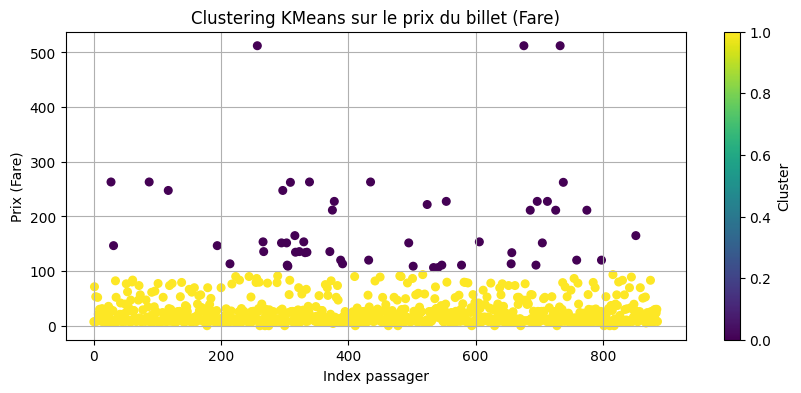

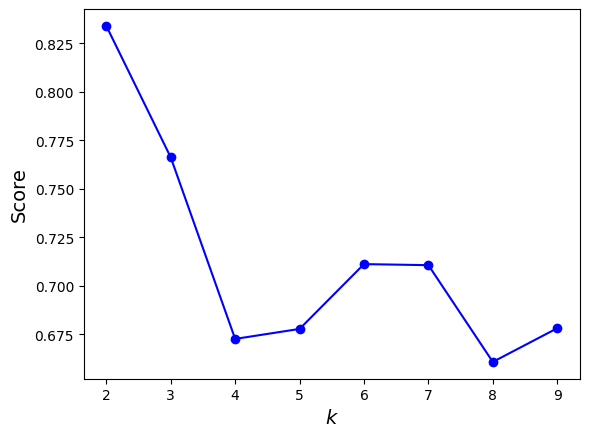

In [106]:
#Avec Kmeans 

fare_1D = fare.reshape(-1,1)
K = 2 # nombres de clusters cherchés 
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters= K, random_state=42)
kmeans.fit(fare_1D)
clusters = kmeans.predict(fare_1D)

print(np.unique(clusters, return_counts=True))
import matplotlib.pyplot as plt

# Exemple : scatter des passagers, x = prix, couleur = cluster
plt.figure(figsize=(10, 4))
plt.scatter(range(len(fare)), fare, c=clusters, cmap='viridis', s=30)
plt.xlabel("Index passager")
plt.ylabel("Prix (Fare)")
plt.title("Clustering KMeans sur le prix du billet (Fare)")
plt.colorbar(label="Cluster")
plt.grid(True)
plt.show()

from sklearn.metrics import silhouette_score

scores = []
for k in range(2,10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(fare_1D)
    clusters = kmeans.predict(fare_1D)
    score = silhouette_score(fare_1D,clusters) #regroupement de données
    scores.append(score)

plt.plot(range(2, 10), scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Score", fontsize=14)
plt.show() # 1 best -1 worst 

[[ 1.         -0.54891936]
 [-0.54891936  1.        ]]


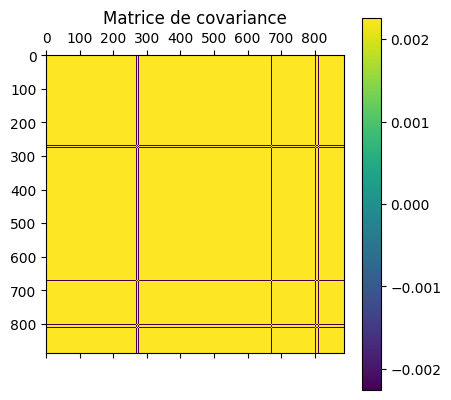

In [107]:
X =  np.vstack([pclass,fare])  
X_reg = (X - np.mean(X,axis=0))/(np.std(X,axis=0))

#Matrice de Correlation 
cov = (1/n) * (X_reg.T@X_reg)
plt.matshow(cov)
plt.colorbar()
plt.title("Matrice de covariance")

print(np.corrcoef(pclass, fare))

### **Test statistique sex $\chi_2$**



Hypothèse 

\begin{equation}
 \begin{cases}
    H_0 : \text{Le sex et la survie sont indép}\\
    H_1 : \text{Le sex et la survie sont dep}
  \end{cases}
\end{equation}

$$
\begin{array}{|c||c|}
\hline
                 & Survie = 0 & survie = 1 \\
 \hline \hline
 sex = 0 & ... &  ...  \\
 \hline
 sex = 1 &  ...  &  ... \\
 \hline
 

\end{array}
$$

In [108]:
tab_cont_sex = np.zeros((2,2))
# print(tab_cont_sex)

for sur in range(2) : 
    for g in range(2) : 
        tab_cont_sex[g,sur]  = np.sum(np.logical_and((sex == g),(survie == sur)))
print("Tableau de contingence sex/survie")
print(tab_cont_sex)
# print(np.sum(tab_cont_sex))
#vérifivation des valeurs obtenues 

marg_l = np.sum(tab_cont_sex , axis=0)/ n
marg_c = np.sum(tab_cont_sex , axis=1)/ n

tab_cont_sex_th = np.outer(marg_c,marg_l) * n
print(tab_cont_sex_th)

chi_2_sex = np.sum(((tab_cont_sex - tab_cont_sex_th)**2) /(tab_cont_sex_th))
print(chi_2_sex) #problème 
chi2_contingency(tab_cont_sex)

Tableau de contingence sex/survie
[[ 81. 233.]
 [464. 109.]]
[[192.93122886 121.06877114]
 [352.06877114 220.93122886]]
260.7153037993831


Chi2ContingencyResult(statistic=np.float64(258.3912607678978), pvalue=np.float64(3.847574039733745e-58), dof=1, expected_freq=array([[192.93122886, 121.06877114],
       [352.06877114, 220.93122886]]))

### test statistique de la variable age

Les deux tests apportent des informations complémentaires
- Test du $\chi_2$ 
- Test student

#### Décompostion de l'age en groupes d'age 

$$
\begin{array}{|c||c|}
\hline
                 & Survie = 0 & survie = 1 \\
 \hline \hline
 age = Enfants(0-12) & ... &  ...  \\
 \hline
 age = Adolecents (13-19) &  ...  &  ... \\
 \hline
    age = Jeunes adultes (20-35) &  ...  &... \\
\hline

    age =  adultes (35 - 60) &  ...  &... \\
\hline
    age =  Seniors (+60) &  ...  &... \\
\hline
\end{array}
$$

⚠️⚠️Limite de cela est fait de façon arbitraire

In [109]:
# Borne des âges (ex: [0, 12[, [12, 19[, [19, 35[, [35, 60[, [60, ∞[
age_bins = [0, 12, 19, 35, 60, np.inf]

tab_cont_age = np.zeros((len(age_bins)-1, 2))

for sur in range(2):
    for g in range(len(age_bins)-1):
        mask = np.logical_and.reduce([
            (age > age_bins[g]),
            (age <= age_bins[g+1]),
            (survie == sur)
        ])
        tab_cont_age[g, sur] = np.sum(mask)
print(tab_cont_age)
chi2_contingency(tab_cont_age)

[[ 36.  43.]
 [ 74.  46.]
 [270. 156.]
 [144.  92.]
 [ 21.   5.]]


Chi2ContingencyResult(statistic=np.float64(13.19677379152892), pvalue=np.float64(0.010353290143167014), dof=4, expected_freq=array([[ 48.54002255,  30.45997745],
       [ 73.73167982,  46.26832018],
       [261.74746336, 164.25253664],
       [145.00563698,  90.99436302],
       [ 15.97519729,  10.02480271]]))

## Test student (t-test)

### t - test :  Age 

In [134]:
#échantionnages

age_sur = age[np.isclose(survie, 1)]  # si float proche de 1
age_nosur = age[np.isclose(survie, 0)]
print(len(age_nosur) + len(age_sur))
print(np.var(age_nosur))
print(np.var(age_sur)) # variances autour 200

# Valeur de ka variance "commune"
var_sur = np.var(age_sur)
n_sur = len(age_sur)
var_nosur = np.var(age_nosur)
n_nosur =len(age_nosur)
var_connu = ((n_sur - 1)*var_sur + (n_nosur - 1)*var_nosur) / (n_sur + n_nosur - 2)
print(var_connu)

# plt.plot(age_sur, 'o', color='green', label='Survécu')
# plt.plot(age_nosur, 'o', color='red', label='Non survécu')

# plt.legend()
# plt.show()



887
192.80879050584966
207.55457431431893
198.49049929532762


Test des moyennes avec variances connues 

\begin{equation}
 \begin{cases}
    H_0 : \mu_{survie} =  \mu_{non survie}\\
    H_1 : \mu_{survie} \neq \mu_{non survie}
  \end{cases}
\end{equation}

In [159]:
import numpy as np
import scipy.stats as stats
m_sur = np.mean(age_sur)
m_nosur = np.mean(age_nosur)
u = ((m_sur - m_nosur)/np.sqrt(var_connu* ((1/n_sur) + 1/n_nosur)))

p_valeur = pval = 2*(stats.norm.sf(abs(u)))
print(" P valeur : ",(1-p_valeur)/2)
print("moyenne des survivants : ", m_sur)
print("moyenne des non-survivants : ",m_nosur)

 P valeur :  0.4624757524992554
moyenne des survivants :  28.408391812865496
moyenne des non-survivants :  30.13853211009174


u $\sim N(0,1)$

### t - test :  Fare 

In [160]:
#échantionnages
fare_sur = fare[np.isclose(survie, 1)]  # si float proche de 1
fare_nosur = fare[np.isclose(survie, 0)]

# Valeur de ka variance "commune"
n_fare_sur = len(fare_sur)
m_fare_sur = np.mean(fare_sur)


n_fare_nosur=len(fare_nosur)
m_fare_nosur = np.mean(fare_nosur)

#Calcul de l'estimateur de variance 

Sfare_sur = np.sum((fare_sur-m_fare_sur)**2)
Sfare_nosur  = np.sum((fare_nosur-m_fare_nosur)**2)

shat = (Sfare_sur + Sfare_nosur)/(n_fare_sur+n_fare_nosur-2)
t = (m_fare_sur-m_fare_nosur)/np.sqrt(shat*(1/n_fare_sur+1/n_fare_nosur))
pval = 2*(1 - stats.t.cdf(abs(t),n_fare_sur+n_fare_nosur-2))

pval, shat, t


(np.float64(9.325873406851315e-15),
 np.float64(2318.2267274367364),
 np.float64(7.884140627746887))

# Regression

# Fonction de régression


In [ ]:
#Foction reprise de la correction du TP
def ma_reg(X,y):
    '''
    X : numpy array de dimention n x p
    y : numpy array de dimention n
    '''
    n,p = X.shape
    m = np.prod(y.shape)
    if n != m:
        raise Exception('X doit etre une matrice de n lignes et p colonnes et y un vecteur de n lignes')
    X = np.column_stack((np.ones((n,1)),X))
    a = np.linalg.solve(X.T@X,X.T@y)
    z = X@a
    e = y - z # z - y
    s2 = np.sum(e**2)/(n-p-1)
    SCT = np.sum((y-np.mean(y))**2)
    SCE = np.sum(e**2)
    R2 = 1 - SCE/SCT
    H = X@np.linalg.solve(X.T@X,X.T)  # plus stable et plus rapide
    h = np.diag(H)
    c = h/((1-h)**2)*(e**2)/(p*s2)
    
    dv = np.stack([e, h, c])
    
    return a, s2, R2, dv


a, s2, R2, diagd = ma_reg(X,y)

e = diagd[0,:]
h =diagd[1,:]
c =diagd[2,:]
R2
print(a)


In [ ]:
plt.bar(range(n),e)
plt.title('Erreur de chaques observations')
np.corrcoef(X_reg)

## Levier de chaque observations

In [ ]:
plt.bar(range(n),h)
plt.title('Effet levier de chaques observations')

### Etude de la contribution

In [ ]:
plt.bar(range(n),c)
plt.title('Etude de la contributions des observations ')

Valeur sortant du lot 

In [ ]:
print(np.where(c == max(c)))
print(titanic[np.where(c == max(c)),:])